In [6]:
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
tickers = ['TSLA', 'FB']
start = dt.datetime(2015, 1, 1)
end = dt.datetime(2022, 8, 3)
data = yf.download(tickers, start, end, interval='1d')

[*********************100%***********************]  2 of 2 completed


In [15]:
print(data)

             Adj Close                   Close                    High  \
                    FB        TSLA          FB        TSLA          FB   
Date                                                                     
2015-01-02   78.449997   43.862000   78.449997   43.862000   78.930000   
2015-01-05   77.190002   42.018002   77.190002   42.018002   79.245499   
2015-01-06   76.150002   42.256001   76.150002   42.256001   77.589996   
2015-01-07   76.150002   42.189999   76.150002   42.189999   77.360001   
2015-01-08   78.175003   42.124001   78.175003   42.124001   78.230003   
...                ...         ...         ...         ...         ...   
2022-07-27  169.580002  824.460022  169.580002  824.460022  170.869995   
2022-07-28  160.720001  842.700012  160.720001  842.700012  161.509995   
2022-07-29  159.100006  891.450012  159.100006  891.450012  160.139999   
2022-08-01  159.929993  891.830017  159.929993  891.830017  165.190002   
2022-08-02  160.190002  901.760010  16

In [13]:
df = data['Adj Close']
print(df)

                    FB        TSLA
Date                              
2015-01-02   78.449997   43.862000
2015-01-05   77.190002   42.018002
2015-01-06   76.150002   42.256001
2015-01-07   76.150002   42.189999
2015-01-08   78.175003   42.124001
...                ...         ...
2022-07-27  169.580002  824.460022
2022-07-28  160.720001  842.700012
2022-07-29  159.100006  891.450012
2022-08-01  159.929993  891.830017
2022-08-02  160.190002  901.760010

[1909 rows x 2 columns]


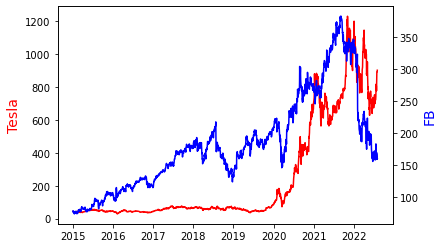

In [16]:
fid,ax = plt.subplots()
ax.set_ylabel("Tesla", color="red", fontsize = 14)
ax.plot(df['TSLA'], color = 'red')

ax2 = ax.twinx()
ax2.plot(df['FB'], color = 'blue')
ax2.set_ylabel('FB', color = 'blue', fontsize = 14)
plt.show()

In [17]:
#Step 1: Import packages
#Calculations
import numpy as np
#Data management
import pandas as pd
#Plot date
import matplotlib.pyplot as plt
#Import date from Yahoo finance
import yfinance as yf
#Creates dates
import datetime as dt
#Normal distribution calcualtions
from scipy.stats import norm

In [18]:
#Step 2: Download financial data
tickers = ['AMZN']
start = dt.datetime(2001, 1, 1)
end = dt.datetime(2021, 12, 31)
data = yf.download(tickers, start, end, interval="1d")
data = data['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [19]:
#Step 3: Calculate log returns
log_returns = np.log(data/data.shift()).dropna()
print(log_returns)

Date
2001-01-03    0.235677
2001-01-04   -0.124926
2001-01-05   -0.062390
2001-01-08    0.025425
2001-01-09    0.091881
                ...   
2021-12-23    0.000184
2021-12-27   -0.008212
2021-12-28    0.005827
2021-12-29   -0.008592
2021-12-30   -0.003294
Name: Adj Close, Length: 5282, dtype: float64


<AxesSubplot:title={'center':'AMZN log returns'}, xlabel='Date'>

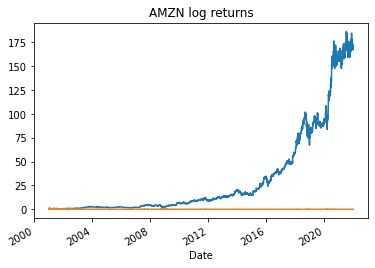

In [21]:
#Step 4: Plot the data
data.plot(title="AMZN stock price")
log_returns.plot(title="AMZN log returns")

In [25]:
#Intermezzo: How to define a function
#A function is a block of code which only runs when it is called. 
#You can pass data, known as parameters, into a function. A function can return data as a result.
def square(n):
    return n*n
#Another way to define an "anonymous" function
x = lambda n: n*n
#Example
print(square(2))
print(x(2))

4
4


In [26]:
#Suppose we want to take the square of a list of numbers
my_list = [2,3,4,5,6,7,8,9]

#Solution: map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)
squared_list = map(square, my_list)
print(my_list)
print(list(squared_list))

[2, 3, 4, 5, 6, 7, 8, 9]
[4, 9, 16, 25, 36, 49, 64, 81]


In [28]:
#How to use if statements in Python

a = 33
b = 200
if b > a:
    print("b is greater than a")

#The elif keyword is pythons way of saying "if the previous conditions were not true, then try this condition".
a = 33
b = 33
if b > a:
    print("b is greater than a")
elif a == b:
    print("a and b are equal")

#The else keyword catches anything which isn't caught by the preceding conditions.
a = 200
b = 33
if b > a:
    print("b is greater than a")
elif a == b:
    print("a and b are equal")
else:
    print("a is greater than b")

b is greater than a
a and b are equal
a is greater than b


In [29]:
#Shift index by desired number of periods 
df = pd.DataFrame([206, 205, 204, 205, 203, 205 ], 
    columns=["returns"])
print(df)
df.shift(1)

   returns
0      206
1      205
2      204
3      205
4      203
5      205


,returns
0,NaN
1,206.0
2,205.0
3,204.0
4,205.0
5,203.0


In [30]:
#Step 5: Define a "trading strategy" function
def TradingStrategy(returns):
    position = returns.map(lambda x: -1 if x <= 0 else 1)
    performance = position.shift(1) * returns
    return performance

outcome = TradingStrategy(log_returns)
print(outcome)

Date
2001-01-03         NaN
2001-01-04   -0.124926
2001-01-05    0.062390
2001-01-08   -0.025425
2001-01-09    0.091881
                ...   
2021-12-23    0.000184
2021-12-27   -0.008212
2021-12-28   -0.005827
2021-12-29   -0.008592
2021-12-30    0.003294
Name: Adj Close, Length: 5282, dtype: float64


In [33]:
df = pd.DataFrame([206, 205, 204, 205, 203, 205 ], 
    columns=["returns"])

#Calculate the mean
sum_df = df.sum()
mean_df = np.mean(df)
st_dev_df = np.std(df)
print(sum_df)
print(mean_df)
print(st_dev_df)

perf_cum = np.exp(outcome.sum())
ann = perf_cum ** (1 / 10) - 1
vol = np.std(outcome) * np.sqrt(252)
print(perf_cum)
print(ann)
rfr = 0.01
sharpe = (ann - rfr) / vol

returns    1228
dtype: int64
returns    204.666667
dtype: float64
returns    0.942809
dtype: float64
0.8212361444980986
-0.019501789126862845


In [34]:
#Inverse normal distrbution
#norm.ppf() takes a percentage and returns a standard deviation multiplier for what value that percentage occurs at. 
norm.ppf(0.99,0,1)

#1-day VaR 99
mean = np.mean(outcome)
st_dev = np.std(outcome)
VaR_99_par = norm.ppf(0.99,mean,st_dev)
print(VaR_99_par)

VaR_99_hist = outcome.quantile(0.01)
print(-VaR_99_par)

0.06737190452387419
-0.06737190452387419
